In [1]:
include("../source/spin-1_XY_ED.jl")

odlro_matrix (generic function with 1 method)

#### 1) Fidelity when $ J_2 = 0 $ 

In [2]:
N = 8
J1,J3,D,h = 1.0,0.1,0.1,1.0
boundary = "OBC"
use_sparse = false
basis_list = gen_basis_full_1D(N)
neel_state = nematic_neel_1D(N,basis_list)
ferro_state = nematic_ferro_1D(N,basis_list)
target_state = [i % 3 == 1 ? 1 : i % 3 == 2 ? 0 : -1 for i in 1:N]
prod_state::Vector{Float64} = [basis == target_state ? 1.0 : 0.0 for basis in basis_list]
prod_state = prod_state/norm(prod_state)

time_list::Vector{Float64} = Vector{Float64}((LinRange(0,40,800)))
n_t = length(time_list)
t_step = time_list[2]-time_list[1];

In [3]:
@time begin
    top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\unperturbed\\OBC")
    neel_evolved_file = joinpath(top_folder,"neel_t_evolved_state",
    "evolved_state_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_tstep=$(round(t_step,digits=6)).jld2")
    ferro_evolved_file = joinpath(top_folder,"ferro_t_evolved_state",
    "evolved_state_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_tstep=$(round(t_step,digits=6)).jld2")
    prod_evolved_file = joinpath(top_folder,"prod_t_evolved_state",
    "evolved_state_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_tstep=$(round(t_step,digits=6)).jld2")
    neel_evolved_state_list = JLD2.load(neel_evolved_file)["evolved_state_list"]
    ferro_evolved_state_list = JLD2.load(ferro_evolved_file)["evolved_state_list"]
    prod_evolved_state_list = JLD2.load(prod_evolved_file)["evolved_state_list"]
    neel_fidelity_list::Vector{Float64} = Vector{Float64}(undef,n_t)
    ferro_fidelity_list::Vector{Float64} = Vector{Float64}(undef,n_t)
    prod_fidelity_list::Vector{Float64} = Vector{Float64}(undef,n_t)
#     analytic_fidelity_list::Vector{Float64} = Vector{Float64}(undef,n_t)

    for i in 1:n_t
        t = time_list[i]
        neel_t_evolved_state = neel_evolved_state_list[i]
        neel_fidelity_list[i] = abs2(dot(neel_state,neel_t_evolved_state))
        ferro_t_evolved_state = ferro_evolved_state_list[i]
        ferro_fidelity_list[i] = abs2(dot(ferro_state,ferro_t_evolved_state))
        prod_t_evolved_state = prod_evolved_state_list[i]
        prod_fidelity_list[i] = abs2(dot(prod_state,prod_t_evolved_state))
#         analytic_fidelity_list[i] = cos(h*t)^(2*N)
    end
end;

  5.089826 seconds (1.81 M allocations: 340.979 MiB, 5.14% gc time, 44.68% compilation time: 40% of which was recompilation)


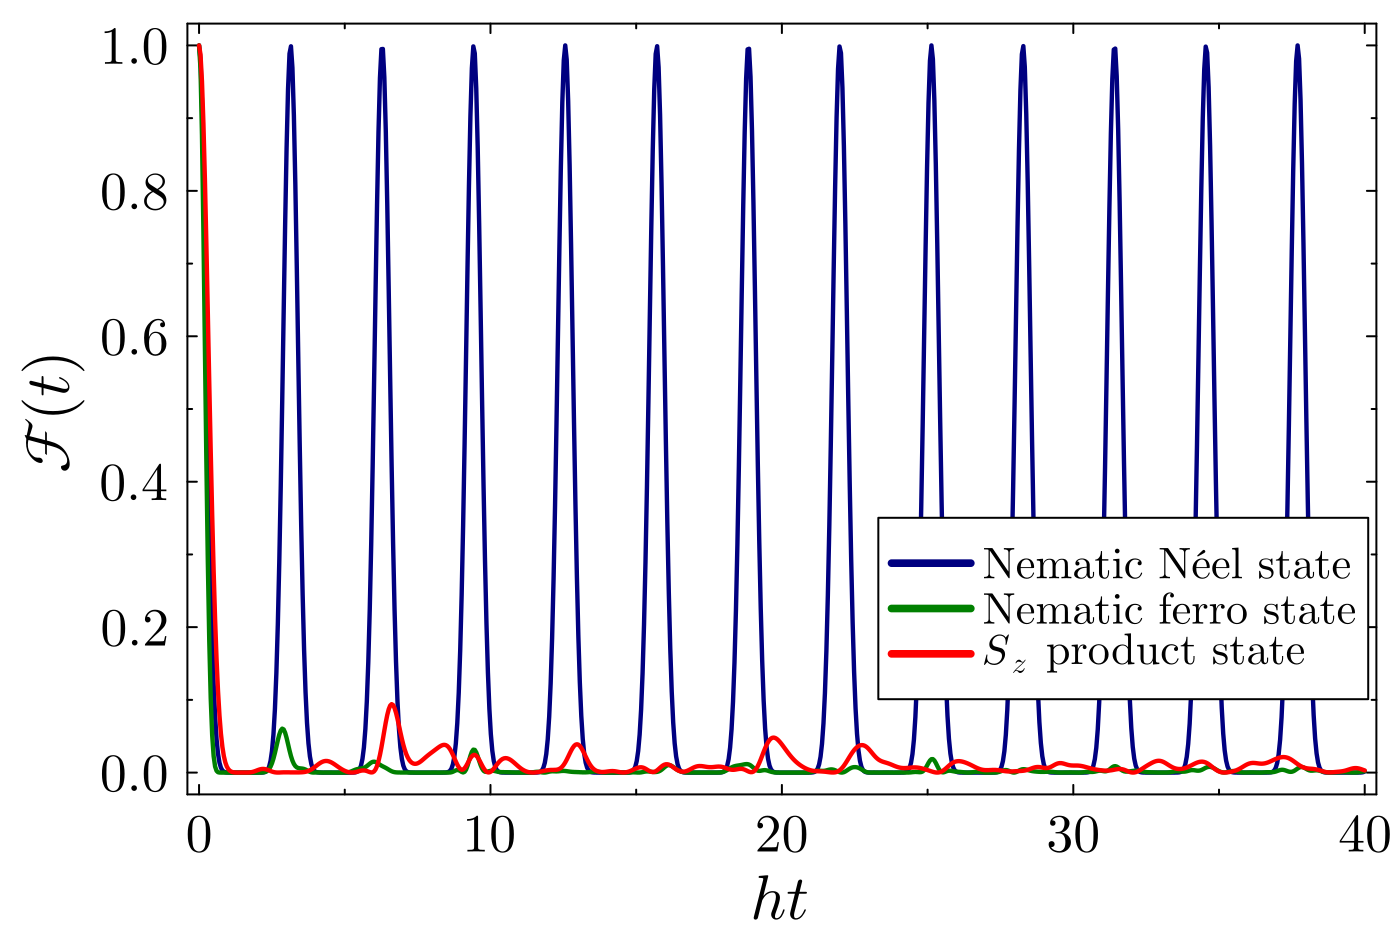

In [42]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

# Set the figure size
plot_size = (700,466.67)
default(fontfamily="Computer Modern")

# Define the plot
p = plot(h*time_list,neel_fidelity_list,lw=2.2,c=:navy,label="Nematic Néel state",
         size=plot_size,dpi=200)
plot!(h*time_list,ferro_fidelity_list,lw=2.2,c=:green,label="Nematic ferro state")
plot!(h*time_list,prod_fidelity_list,lw=2.2,c=:red,label="\$S_{z}\$ product state")
# scatter!(h*time_list,analytic_fidelity_list,ms=3,lw=0,c=:brown,label="Analytic Fidelity")

plot!(left_margin=4mm,right_margin=1mm,top_margin=1mm,bottom_margin=2mm)
plot!(framestyle=:box)
plot!(legend_position=(0.67,0.3),legendfontsize=14,legend_background_color=:white,legend_foreground_color=:black)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\$ht\$",guidefontsize=21)
ylabel!("\$\\mathcal{F}(t)\$",guidefontsize=21)
title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 0,10,40
y1,y_step,y2 = 0.0,0.2,1.0
xticks = (x1:x_step:x2,string.(x1:x_step:x2))
yticks = (y1:y_step:y2,string.(y1:y_step:y2))
xminor_ticks = 2
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=17,tick_direction=:in)
plot!(xlims=(-0.4,x2+0.4))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\unperturbed\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Fidelity_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)

#### 2) Fidelity when $ J_2 \neq 0 $ 

In [2]:
N = 8
J1,J3,D,h = 1.0,0.1,0.1,1.0
boundary = "OBC"
use_sparse = false
basis_list = gen_basis_full_1D(N)
neel_state = nematic_neel_1D(N,basis_list)

time_list::Vector{Float64} = Vector{Float64}((LinRange(0,400,4000)))
n_t = length(time_list)
t_step = time_list[2]-time_list[1];

In [3]:
@time begin
    J2_list::Vector{Float64} = Vector{Float64}([0.02,0.03,0.05,0.07,0.2])
    J2_neel_fidelity_list::Vector{Vector{Float64}} = Vector{Vector{Float64}}(undef,length(J2_list))
    
    for (pos,J2) in enumerate(J2_list)    
        top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\OBC")
        neel_evolved_file = joinpath(top_folder,"neel_t_evolved_state",
        "evolved_state_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_J2=$(round(J2,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_tstep=$(round(t_step,digits=6)).jld2")
        neel_evolved_state_list = JLD2.load(neel_evolved_file)["evolved_state_list"]        

        neel_fidelity_list::Vector{Float64} = Vector{Float64}(undef,n_t)
        for i in 1:n_t
            neel_t_evolved_state = neel_evolved_state_list[i]
            neel_fidelity_list[i] = abs2(dot(neel_state,neel_t_evolved_state))
        end
        J2_neel_fidelity_list[pos] = neel_fidelity_list
    end
end;

 22.759082 seconds (1.87 M allocations: 2.059 GiB, 4.50% gc time, 13.37% compilation time: 88% of which was recompilation)


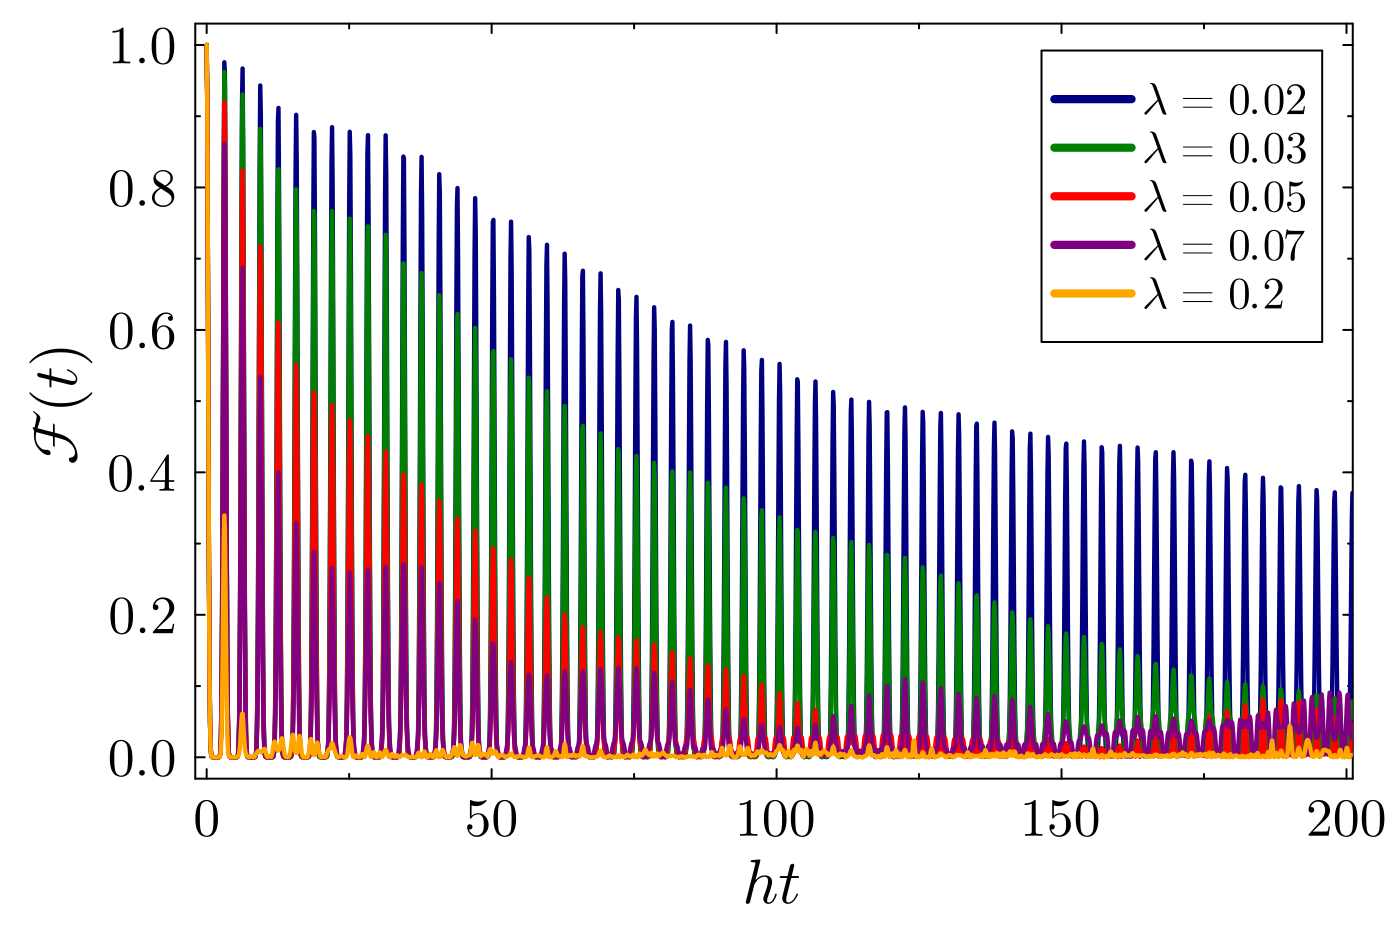

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=8\\sec_nbr_perturbed\\OBC\\Fidelity_J1=1.0_J3=0.1_J2_D=0.1_h=1.0.png"

In [15]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)
default(fontfamily="Computer Modern")

J2_1 = round(J2_list[1],digits=3)
J2_2 = round(J2_list[2],digits=3)
J2_3 = round(J2_list[3],digits=3)
J2_4 = round(J2_list[4],digits=3)
J2_5 = round(J2_list[5],digits=3)
# J2_6 = round(J2_list[6],digits=2)

p = plot(h*time_list,J2_neel_fidelity_list[1],lw=2.2,c=:navy,label="\$\\lambda=$(J2_1)\$",
                                                                    size=plot_size,dpi=200)
plot!(h*time_list,J2_neel_fidelity_list[2],lw=2.2,c=:green,label="\$\\lambda=$(J2_2)\$")
plot!(h*time_list,J2_neel_fidelity_list[3],lw=2.2,c=:red,label="\$\\lambda=$(J2_3)\$")
plot!(h*time_list,J2_neel_fidelity_list[4],lw=2.2,c=:purple,label="\$\\lambda=$(J2_4)\$")
plot!(h*time_list,J2_neel_fidelity_list[5],lw=2.2,c=:orange,label="\$\\lambda=$(J2_5)\$")
# plot!(h*time_list,J2_neel_fidelity_list[6],lw=2.2,c=:cyan,label="\$\\lambda=$(J2_6)\$")

plot!(left_margin=5mm,right_margin=4mm,top_margin=1mm,bottom_margin=4mm)
plot!(framestyle=:box)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
plot!(legend_position=(0.82,0.9),legendfontsize=15,legend_background_color=:white,legend_foreground_color=:black)

xlabel!("\$ht\$",guidefontsize=21)
ylabel!("\$\\mathcal{F}(t)\$",guidefontsize=21)
title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 0,50,200
y1,y_step,y2 = 0.0,0.2,1.0
xticks = (x1:x_step:x2,string.(x1:x_step:x2))
yticks = (y1:y_step:y2,string.(y1:y_step:y2))
xminor_ticks = 2 
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=17,tick_direction=:in)
plot!(xlims=(-2,x2+1.1))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Fidelity_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_J2_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)